## Importing Libraries and Data reading

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("Salary Dataset.csv")

In [3]:
df.head()

,Company Name,Job Title,Salaries Reported,Location,Salary
0,Mu Sigma,Data Scientist,105.0,Bangalore,"₹6,48,573/yr"
1,IBM,Data Scientist,95.0,Bangalore,"₹11,91,950/yr"
2,Tata Consultancy Services,Data Scientist,66.0,Bangalore,"₹8,36,874/yr"
3,Impact Analytics,Data Scientist,40.0,Bangalore,"₹6,69,578/yr"
4,Accenture,Data Scientist,32.0,Bangalore,"₹9,44,110/yr"


# EDA

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4344 entries, 0 to 4343
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Company Name       4341 non-null   object 
 1   Job Title          4344 non-null   object 
 2   Salaries Reported  4342 non-null   float64
 3   Location           4344 non-null   object 
 4   Salary             4344 non-null   object 
dtypes: float64(1), object(4)
memory usage: 169.8+ KB


## Shape of the dataset

In [5]:
df.shape

(4344, 5)

**There are a total of 4344 records available in this dataset**

## NULL values

In [6]:
df.isnull().sum()

Company Name         3
Job Title            0
Salaries Reported    2
Location             0
Salary               0
dtype: int64

In [7]:
df[df['Company Name'].isna()]

,Company Name,Job Title,Salaries Reported,Location,Salary
2279,NaN,Data Analyst,1.0,Pune,"₹23,500/mo"
3227,NaN,Data Engineer,1.0,Pune,"₹26,20,604/yr"
4026,NaN,Machine Learning Engineer/Data Scientist,1.0,Pune,"₹56,465/mo"


**There are 3 records where company name is not available**

In [8]:
df[df['Salaries Reported'].isna()]

,Company Name,Job Title,Salaries Reported,Location,Salary
4027,First Student Data Scientist,Data Analyst,NaN,Pune,"₹4,53,300/yr"
4237,Amazon,Machine Learning Data Associate II,NaN,New Delhi,"₹3,29,439/yr"


**Since there are quite enough number of data points iam removing the records where there are null values**

In [9]:
df.drop(df.index[[4027,4237,2279,3227,4026]],inplace =True)

In [10]:
df.shape

(4339, 5)

In [11]:
df.isnull().sum()

Company Name         0
Job Title            0
Salaries Reported    0
Location             0
Salary               0
dtype: int64

## Splitter Function

In [12]:
def splitter (col_name):
  df[[col_name, 'working duration type']] = df[col_name].str.split('/', expand=True)
  return df


In [13]:
splitter("Salary")

,Company Name,Job Title,Salaries Reported,Location,Salary,working duration type
0,Mu Sigma,Data Scientist,105.0,Bangalore,"₹6,48,573",yr
1,IBM,Data Scientist,95.0,Bangalore,"₹11,91,950",yr
2,Tata Consultancy Services,Data Scientist,66.0,Bangalore,"₹8,36,874",yr
3,Impact Analytics,Data Scientist,40.0,Bangalore,"₹6,69,578",yr
4,Accenture,Data Scientist,32.0,Bangalore,"₹9,44,110",yr
...,...,...,...,...,...,...
4339,TaiyōAI,Machine Learning Scientist,1.0,Mumbai,"₹5,180",mo
4340,Decimal Point Analytics,Machine Learning Developer,1.0,Mumbai,"₹7,51,286",yr
4341,MyWays,Machine Learning Developer,1.0,Mumbai,"₹4,10,952",yr
4342,Market Pulse Technologies,Software Engineer - Machine Learning,1.0,Mumbai,"₹16,12,324",yr


**Since the salaries are having month, hour and year wise values iam trying to make them year wise by multiplying by 12 where monthly salary is given**

In [14]:
df["working duration type"].value_counts()

yr    3229
mo    1088
hr      22
Name: working duration type, dtype: int64

In [15]:
df['currency'] = df['Salary'].str[0]
df['Salary'] = df['Salary'].str[1:]

In [16]:
df["currency"].value_counts()

₹    4313
$      19
£       6
A       1
Name: currency, dtype: int64

## Replacing Values

In [17]:
df['Salary'] = df['Salary'].str.replace(',', '')

In [18]:
df[df["Salary"] == 'FN 156179']

,Company Name,Job Title,Salaries Reported,Location,Salary,working duration type,currency
2278,md,Data Analyst,1.0,Pune,FN 156179,yr,A


In [19]:
df['Salary'] = df['Salary'].replace(['FN 156179'],'156179')

In [20]:
df['Salary'] = df['Salary'].astype(int)

In [21]:
df["Salary"].dtype

dtype('int64')

In [22]:
df['Salary'] = np.where(df['working duration type'] == 'mo',(df['Salary']) *12,df['Salary'])
df['Salary'] = np.where(df['working duration type'] == 'hr',(df['Salary']) *480,df['Salary'])

In [23]:
df['Salary'].loc[df['currency'] == '$'] = df['Salary'] * 75.94
df['Salary'].loc[df['currency'] == '£'] = df['Salary'] * 99.20
df['Salary'].loc[df['currency'] == 'A'] = df['Salary'] * 0.86

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [24]:
df[df["currency"]=="$"]

,Company Name,Job Title,Salaries Reported,Location,Salary,working duration type,currency
415,ICICI Bank,Data Scientist,1.0,Bangalore,17082551.12,yr,$
658,Infosys,Data Scientist,1.0,Bangalore,38851891.22,yr,$
1096,Schlumberger,Data Scientist,1.0,Pune,4064840.38,yr,$
1846,IBM,Data Scientist,1.0,Mumbai,15603847.44,yr,$
1857,ABC,Data Scientist,1.0,Mumbai,7346359.66,yr,$
1859,Google,Data Scientist,1.0,Mumbai,9449517.96,yr,$
1865,DONE by NONE,Data Scientist,1.0,Mumbai,45898439.76,mo,$
1869,Bharti Airtel,Data Scientist,1.0,Mumbai,45898211.94,yr,$
2283,EBC,Data Analyst,1.0,Pune,6431966.12,yr,$
2486,Genpact,Data Analyst,1.0,Hyderabad,39009618.60,yr,$


In [25]:
df.shape

(4339, 7)

**Since the salary value is very absurd i prefer to delete those rows that have dollors and euro symbol as it may be given as dollor or euro by mistake**

## New df containing only rupee values

In [26]:
df1 = df[df["currency"]=="₹"]

In [27]:
df1.reset_index(drop =True)

,Company Name,Job Title,Salaries Reported,Location,Salary,working duration type,currency
0,Mu Sigma,Data Scientist,105.0,Bangalore,648573.0,yr,₹
1,IBM,Data Scientist,95.0,Bangalore,1191950.0,yr,₹
2,Tata Consultancy Services,Data Scientist,66.0,Bangalore,836874.0,yr,₹
3,Impact Analytics,Data Scientist,40.0,Bangalore,669578.0,yr,₹
4,Accenture,Data Scientist,32.0,Bangalore,944110.0,yr,₹
...,...,...,...,...,...,...,...
4308,TaiyōAI,Machine Learning Scientist,1.0,Mumbai,62160.0,mo,₹
4309,Decimal Point Analytics,Machine Learning Developer,1.0,Mumbai,751286.0,yr,₹
4310,MyWays,Machine Learning Developer,1.0,Mumbai,410952.0,yr,₹
4311,Market Pulse Technologies,Software Engineer - Machine Learning,1.0,Mumbai,1612324.0,yr,₹


# Visualisation

In [28]:
df1["Company Name"].value_counts()

Tata Consultancy Services    40
Accenture                    30
Amazon                       30
Fresher                      26
Google                       26
                             ..
Ankit R Jain & Associates     1
subodh singh                  1
Gi Group                      1
Qwerty Concepts               1
Market Pulse Technologies     1
Name: Company Name, Length: 2522, dtype: int64

**There are a total of 2522 different companies in this dataset**

In [29]:
df1["Company Name"].unique()

array(['Mu Sigma', 'IBM', 'Tata Consultancy Services', ...,
       'Myraa Technologies', 'TaiyōAI', 'Market Pulse Technologies'],
      dtype=object)

In [30]:
df1["Job Title"].value_counts()

Data Scientist                          1832
Data Analyst                             985
Data Engineer                            797
Machine Learning Engineer                564
Data Science                              43
Senior Data Scientist                     39
Junior Data Scientist                     18
Senior Machine Learning Engineer           9
Lead Data Scientist                        6
Machine Learning Scientist                 2
Machine Learning Consultant                2
Software Engineer - Machine Learning       2
Machine Learning Developer                 2
Data Science Associate                     1
Machine Learning Software Engineer         1
Data Science Consultant                    1
Data Science Lead                          1
Machine Learning Data Associate            1
Machine Learning Data Associate I          1
Machine Learning Associate                 1
Machine Learning Data Associate II         1
Associate Machine Learning Engineer        1
Machine Le

In [31]:
df1["Job Title"].nunique()

25

**There are a total of 25 unique jobs but i feel some are the same jobs but named differently**

In [32]:
df1["Location"].value_counts()

Bangalore    1580
Pune          807
Hyderabad     664
New Delhi     654
Mumbai        608
Name: Location, dtype: int64

**There are a total of six locations that the data consists**

**1.Most people work in Banglore**
 
**2.Least number of people work in Mumbai** 

In [33]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
Salaries Reported,4313.0,2.787619,5.161795,1.0,1.0,1.0,3.0,105.0
Salary,4313.0,912450.310457,852058.243144,10814.0,419297.0,703418.0,1180965.0,18807948.0


## Basic aggregates

In [34]:
print("Maximun Salary = ₹", round(df1["Salary"].max()))
print("Minimum Salary = ₹", round(df1["Salary"].min()))
print("Mean Salary = ₹", round(df1["Salary"].mean()))
print("Median Salary = ₹", round(df1["Salary"].median()))

Maximun Salary = ₹ 18807948
Minimum Salary = ₹ 10814
Mean Salary = ₹ 912450
Median Salary = ₹ 703418


In [35]:
df1[df1["Salary"]==18807948]

,Company Name,Job Title,Salaries Reported,Location,Salary,working duration type,currency
900,L Brands,Data Scientist,1.0,Bangalore,18807948.0,mo,₹


In [36]:
df1[df1["Salary"]==10814]

,Company Name,Job Title,Salaries Reported,Location,Salary,working duration type,currency
2471,Orbit Technologies,Data Analyst,1.0,Hyderabad,10814.0,yr,₹


In [37]:
df1[df1["Salary"]==703418]

,Company Name,Job Title,Salaries Reported,Location,Salary,working duration type,currency
2378,Saras Analytics,Data Analyst,5.0,Hyderabad,703418.0,yr,₹
3938,FaceX,Machine Learning Engineer,1.0,Bangalore,703418.0,yr,₹
4066,Unknowns,Machine Learning Engineer,1.0,Hyderabad,703418.0,yr,₹
4105,Sonata Services,Machine Learning Engineer,1.0,Hyderabad,703418.0,yr,₹


##Top 5 cities

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


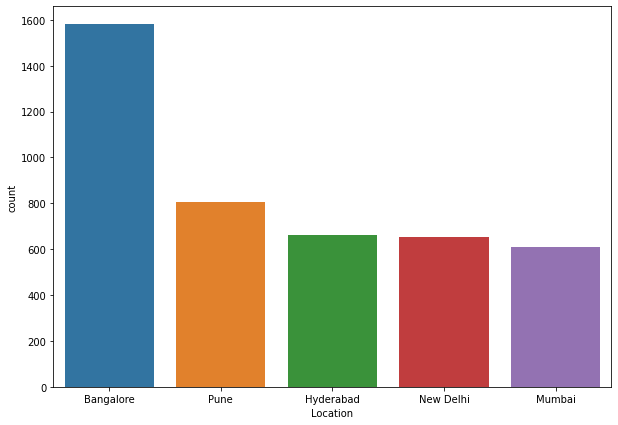

In [38]:
plt.figure(figsize = (10, 7))
sns.countplot(df1["Location"])

**As seen most people work in banglore**

##Top 5 Jobs

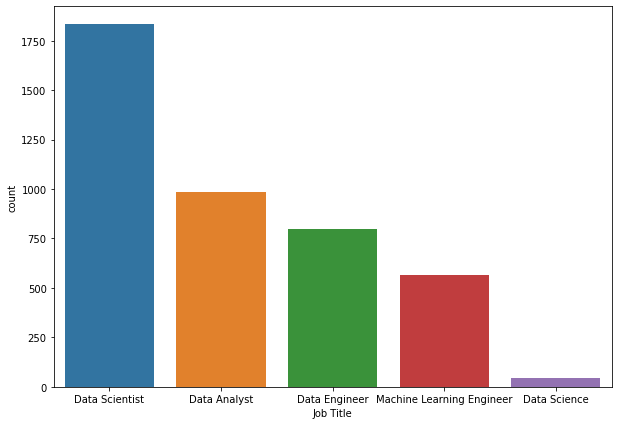

In [39]:
plt.figure(figsize = (10, 7))
plt.xticks(rotation = 0)
sns.countplot(x = 'Job Title',
              data = df1,
              order = df1['Job Title'].value_counts()[:5].index)

##Salary Distribution

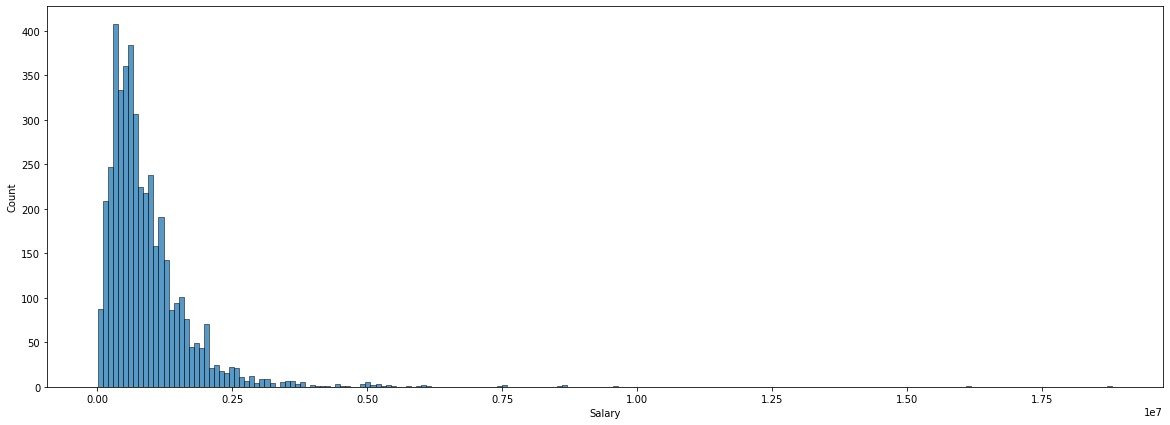

In [40]:
plt.figure(figsize = (20, 7))
sns.histplot(df1["Salary"])

**Data is quite correct as the salaries will be skewed and there cant be any negative values as well**

Salaries reported

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


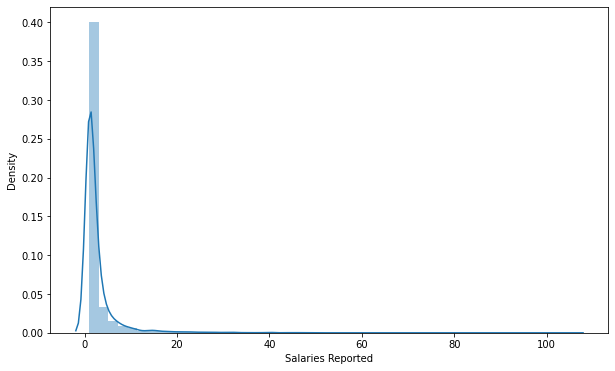

In [41]:
plt.figure(figsize = (10,6))
sns.distplot(df1["Salaries Reported"])

## Mean salary of each location

In [42]:
pd.set_option('display.float_format', '{:.2f}'.format)
pd.DataFrame((df1.groupby("Location")["Salary"].mean()).sort_values(ascending = False))

,Salary
Location,
Bangalore,1045637.14
Pune,877020.49
New Delhi,828243.67
Hyderabad,816832.18
Mumbai,808368.50


##Mean salaries per job titles

In [43]:
pd.set_option('display.float_format', '{:.2f}'.format)
pd.DataFrame((df1.groupby("Job Title")["Salary"].mean()).sort_values(ascending = False))

,Salary
Job Title,
Data Science Manager,4619021.00
Data Science Lead,4068310.00
Data Science Consultant,2671464.00
Lead Data Scientist,1852189.00
Senior Data Scientist,1766129.54
Software Engineer - Machine Learning,1566780.00
Senior Machine Learning Engineer,1473436.00
Machine Learning Software Engineer,1397347.00
Data Science Associate,1203913.00


##Highest paying company

In [44]:
df1[df1["Salary"] == df1["Salary"].max()]

,Company Name,Job Title,Salaries Reported,Location,Salary,working duration type,currency
900,L Brands,Data Scientist,1.00,Bangalore,18807948.00,mo,₹


##Lowest paying company

In [45]:
df1[df1["Salary"] == df1["Salary"].min()]

,Company Name,Job Title,Salaries Reported,Location,Salary,working duration type,currency
2471,Orbit Technologies,Data Analyst,1.00,Hyderabad,10814.00,yr,₹


In [46]:
df1[df1["Company Name"]=='Goldman Sachs']

,Company Name,Job Title,Salaries Reported,Location,Salary,working duration type,currency
372,Goldman Sachs,Data Scientist,1.00,Bangalore,1465644.00,mo,₹
513,Goldman Sachs,Data Scientist,1.00,Bangalore,3500000.00,yr,₹
1990,Goldman Sachs,Data Analyst,9.00,Bangalore,1462260.00,yr,₹
2479,Goldman Sachs,Data Analyst,1.00,Hyderabad,455550.00,yr,₹
3644,Goldman Sachs,Data Engineer,1.00,Mumbai,3977066.00,yr,₹


##Mean salary of Companies that has been reported more than 10 times

In [47]:
df2 = df1[df1["Salaries Reported"]>10]

In [48]:
df3 = pd.DataFrame((df2.groupby("Company Name")["Salary"].mean()).sort_values(ascending = False))

In [49]:
df3.head(50)

,Salary
Company Name,
Société Générale,1870000.00
MiQ,1739484.00
Microsoft,1671287.00
Anheuser-Busch InBev,1646721.00
Flipkart,1589481.00
Fuzzy Logix,1556575.00
Google,1545502.00
Shell,1541682.00
HP Inc.,1510081.00


In [50]:
df1[df1["Company Name"] =="Mu Sigma"]

,Company Name,Job Title,Salaries Reported,Location,Salary,working duration type,currency
0,Mu Sigma,Data Scientist,105.00,Bangalore,648573.00,yr,₹
961,Mu Sigma,Data Scientist,1.00,Bangalore,722247.00,yr,₹
1466,Mu Sigma,Data Scientist,1.00,Hyderabad,406548.00,mo,₹
1716,Mu Sigma,Data Scientist,1.00,New Delhi,559071.00,yr,₹
1862,Mu Sigma,Data Scientist,1.00,Mumbai,2498867.00,yr,₹
1956,Mu Sigma,Data Analyst,45.00,Bangalore,610598.00,yr,₹
2981,Mu Sigma,Data Engineer,5.00,Bangalore,786846.00,yr,₹
3354,Mu Sigma,Data Engineer,1.00,Hyderabad,1004884.00,yr,₹
4262,Mu Sigma,Machine Learning Engineer,1.00,Mumbai,671696.00,yr,₹


## Salary types

In [51]:
df["working duration type"].value_counts()

yr    3229
mo    1088
hr      22
Name: working duration type, dtype: int64

## Number of Unique companies

In [52]:
df["Company Name"].nunique()

2528

In [54]:
df1[df1['Job Title'].str.contains('Associate')]

,Company Name,Job Title,Salaries Reported,Location,Salary,working duration type,currency
1253,ZS Associates,Data Science Associate,9.00,Pune,1203913.00,yr,₹
4115,Amazon,Machine Learning Data Associate,38.00,Hyderabad,275841.00,yr,₹
4116,Amazon,Machine Learning Data Associate I,9.00,Hyderabad,258596.00,yr,₹
4117,Amazon,Machine Learning Associate,6.00,Hyderabad,295114.00,yr,₹
4118,Amazon,Machine Learning Data Associate II,5.00,Hyderabad,383213.00,yr,₹
4120,Techolution,Associate Machine Learning Engineer,3.00,Hyderabad,464372.00,yr,₹


In [55]:
df1[df1['Job Title'].str.contains('Scientist')]

,Company Name,Job Title,Salaries Reported,Location,Salary,working duration type,currency
0,Mu Sigma,Data Scientist,105.00,Bangalore,648573.00,yr,₹
1,IBM,Data Scientist,95.00,Bangalore,1191950.00,yr,₹
2,Tata Consultancy Services,Data Scientist,66.00,Bangalore,836874.00,yr,₹
3,Impact Analytics,Data Scientist,40.00,Bangalore,669578.00,yr,₹
4,Accenture,Data Scientist,32.00,Bangalore,944110.00,yr,₹
...,...,...,...,...,...,...,...
1952,Visible Alpha,Data Scientist,1.00,Mumbai,1581030.00,yr,₹
1953,Netcore Solutions,Data Scientist,1.00,Mumbai,509047.00,yr,₹
4028,"R. C. Patel Institute of Technology, Shirpur",Data Scientist,1.00,Pune,807180.00,yr,₹
4338,Myraa Technologies,Machine Learning Scientist,1.00,Mumbai,278076.00,mo,₹


##Top Companies

In [57]:
df1["Company Name"].value_counts().head(50)

Tata Consultancy Services                    40
Accenture                                    30
Amazon                                       30
Fresher                                      26
Google                                       26
First Student                                25
IBM                                          25
Infosys                                      22
DONE by NONE                                 20
Cognizant Technology Solutions               19
ABC                                          19
Capgemini                                    17
Microsoft                                    17
Wipro                                        17
LTI                                          16
Deloitte                                     16
Tech Mahindra                                16
Nones                                        15
Fractal                                      14
HCL Technologies                             14
Wipro Technologies                      